#Este programa contém os código demonstrados na aula sobre Aplicação de ML+IoT para o Healthcare(previsão de arritmia)

In [46]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para tratar os dados em formato de dataframe
import numpy as np # biblioteca utilizada para tratar vetores e matrizesimport matplotlib.pyplot as plt  #utilizapa para construir os gráficos em um formato similar ao "Matlab"
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split #utilizada para realizar o divisão entre dados para treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #utilizada para verificar a acurácia do modelo construído
from sklearn.naive_bayes import GaussianNB # utilizada para construir o modelo de classificação naive_bayes
import seaborn as sns #utilizada para constuir os gráficos em uma forma mais "bonita"
import matplotlib.pyplot as plt #biblioteca para realizar a construção dos gráficos
from sklearn.svm import SVC #utilizada para importar o algoritmo SVM

In [47]:
#lendo o dataset no formato de um dataframe através da função read do pandas
nomeArquivo = './Datasets/saude.csv' 
dataset = pd.read_csv(nomeArquivo, sep=',') #realiza a leitura do banco de dados

In [48]:
#print do dataset
dataset.head() # são 76 colunas, mas nem todas serão utilizadas para realizar a previsão de doença cardíaca

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,...,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,...,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name


In [49]:
dataset.shape # mostra a dimensão do dataset

(617, 76)

In [50]:
#conhecendo o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           617 non-null    int64  
 1   ccf                           617 non-null    int64  
 2   age                           617 non-null    int64  
 3   sex                           617 non-null    int64  
 4   pain location                 617 non-null    int64  
 5   pain w exertion               617 non-null    int64  
 6   relieved after rest           613 non-null    float64
 7   pncaden                       0 non-null      float64
 8   chest pain type               617 non-null    int64  
 9   resting bp s                  558 non-null    float64
 10  hypertension                  583 non-null    float64
 11  cholesterol                   587 non-null    float64
 12  smoker                        230 non-null    float64
 13  cigar

**Existem vários dados nulos**

In [51]:
#tratando os dados nulos
dataset.fillna(dataset.mean(), inplace=True) #substitui os dados que estão como NAN pela média dos valores na coluna
dataset.head()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,...,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,...,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,...,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,...,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,...,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,...,1.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


**Preparando os dados**

In [52]:
dataset_to_array = np.array(dataset) #transforma o dataframe em array para facilitar a escolha dos dados a serem utilizados

In [53]:
target = dataset_to_array[:,57] # esse é o vetor de saída (target)
target= target.astype('int') #indica o tipo de dados
#target[target>0] = 1 # 0 para o coração saudável e 1 para problema detectado
target

array([0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 3, 3, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 1, 0, 0, 2, 1, 4, 4, 4, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 4, 2, 0, 3, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 3, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 2, 0,
       2, 3, 0, 1, 0, 2, 2, 2, 3, 4, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 2,

**Iniciando a previsão**

In [54]:
# Estamos transformando vários arrays lineares em um array 2D
dataset_sensor = np.column_stack(( 
    dataset_to_array[:,11], # pressão sanguínea em repouso
    dataset_to_array[:,33], # frequencia máxima atingida
    dataset_to_array[:,34], # frequencia cardíaca em repouso
    dataset_to_array[:,35], # pico de pressão sanguínea durante exercício 
    dataset_to_array[:,36], # pico de pressão sanguínea durante exercício  
    dataset_to_array[:,38] # pressão sanguínea em repouso
 ))
dataset_sensor

array([[289.0, 200.0, 110.0, 140.0, 86.0, 0.0],
       [180.0, 220.0, 106.0, 160.0, 90.0, 0.0],
       [283.0, 180.0, 100.0, 130.0, 80.0, 0.0],
       ...,
       [223.0, 210.0, 100.0, 122.0, 70.0, 0.0],
       [385.0, 173.46570397111913, 91.64440433212997, 132.37275985663084,
        82.80465949820788, 0.028622540250447227],
       [254.0, 164.0, 110.0, 120.0, 80.0, 0.0]], dtype=object)

In [55]:
#dataset com os dados médicos do paciente
dataset_medico = np.column_stack((dataset_to_array[:,4] , # localização da dor
    dataset_to_array[:,6] , # Se sente alívio após descansar
    dataset_to_array[:,9] , # tipo de dor 
    dataset_to_array[:,39], # angina induzida pelo exercício (1 = sim; 0 = nao) 
    dataset.age, # idade 
    dataset.sex , # sexo
    dataset.hypertension # hipertensão
 ))
dataset_medico

array([[1, 0.0, 140.0, ..., 40, 1, 0.0],
       [1, 0.0, 160.0, ..., 49, 0, 1.0],
       [1, 0.0, 130.0, ..., 37, 1, 0.0],
       ...,
       [1, 1.0, 122.0, ..., 55, 1, 1.0],
       [1, 1.0, 132.37275985663084, ..., 58, 1, 0.0],
       [1, 0.0, 120.0, ..., 62, 1, 1.0]], dtype=object)

In [56]:
# Basicamente adiciona ao final de cada linha em dataset_medico
# a linha de índice correspondente em dataset_sensor
dataset_paciente=np.concatenate((dataset_medico,dataset_sensor),axis=1)
dataset_paciente

array([[1, 0.0, 140.0, ..., 140.0, 86.0, 0.0],
       [1, 0.0, 160.0, ..., 160.0, 90.0, 0.0],
       [1, 0.0, 130.0, ..., 130.0, 80.0, 0.0],
       ...,
       [1, 1.0, 122.0, ..., 122.0, 70.0, 0.0],
       [1, 1.0, 132.37275985663084, ..., 132.37275985663084,
        82.80465949820788, 0.028622540250447227],
       [1, 0.0, 120.0, ..., 120.0, 80.0, 0.0]], dtype=object)

In [57]:
# Basicamente, de 76 parâmetros diferentes, escolhemos apenas 13 para compor nosso dataset
dataset_paciente.shape

(617, 13)

In [58]:
#encontrando os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dataset_paciente, target, random_state = 223)

In [59]:
#cria o objeto SVM
modelSVM = SVC(kernel = 'linear') #escolha do kernel polinomial

In [60]:
#aplica o treinamento ao modelo
modelSVM.fit(X_train, y_train)


SVC(kernel='linear')

**Analisando a performance do modelo**

In [61]:
previsao = modelSVM.predict(X_test) #aplica o modelo para os dados de teste

In [62]:
#encontra a acuracia do modelo de previsão utilizando o SVM 
accuracia = accuracy_score(y_test, previsao)
print ("Acuracia utilizando o SVM :" , accuracia , "\nEm porcentagem : ", round(accuracia*100) , "%\n")

Acuracia utilizando o SVM : 0.5419354838709678 
Em porcentagem :  54 %



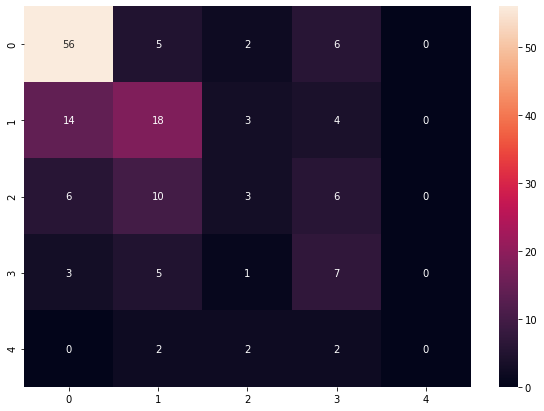

In [63]:
#criando a matriz de confusão
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, previsao) #gera a matriz de confusão
df_cm = pd.DataFrame(cm, index = [i for i in "01234"],columns = [i for i in "01234"]) #cria o df com as classes
plt.figure(figsize = (10,7)) #indica o tamanho da figura 
sn.heatmap(df_cm, annot=True) #plota a figura


**Modificando o Dataset**

In [64]:
#vamos escolher apenas 13 atributos para realizar a previsão de doenças cardíacas

dataset_to_array = np.array(dataset)
label = dataset_to_array[:,57] # "Target" classes binárias 0 e 1
label = label.astype('int')
label

array([0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 3, 3, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 1, 0, 0, 2, 1, 4, 4, 4, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 4, 2, 0, 3, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 3, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 2, 0,
       2, 3, 0, 1, 0, 2, 2, 2, 3, 4, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 2,

In [65]:
label[label>0] = 1 # Quando os dados são 0 está saldável e 1 doente
label

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [66]:
#encontrando os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dataset_paciente, label, random_state = 223)

In [67]:
#cria o objeto SVM
modelSVM = SVC(kernel = 'linear') #escolha do kernel polinomial

In [68]:
#aplica o treinamento ao modelo
modelSVM.fit(X_train, y_train)


SVC(kernel='linear')

In [69]:
previsao = modelSVM.predict(X_test) #aplica o modelo para os dados de teste

In [70]:
#encontra a acuracia do modelo de previsão utilizando o SVM 
accuracia = accuracy_score(y_test, previsao)
print ("Acuracia utilizando o SVM :" , accuracia , "\nEm porcentagem : ", round(accuracia*100) , "%\n")

Acuracia utilizando o SVM : 0.7419354838709677 
Em porcentagem :  74 %



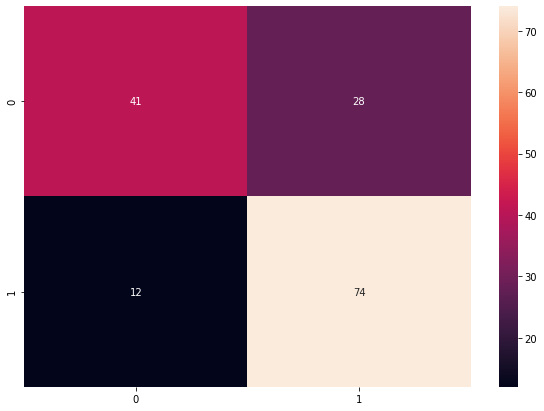

In [71]:
#criando a matriz de confusão
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, previsao) #gera a matriz de confusão
df_cm = pd.DataFrame(cm, index = [i for i in "01"],columns = [i for i in "01"]) #cria o df com as classes
plt.figure(figsize = (10,7)) #indica o tamanho da figura 
sn.heatmap(df_cm, annot=True) #plota a figura
